#Spaceship Titanic Challange

## Data

### Get data

In [ ]:
#import custom libary
!rm tf_helper*
!wget https://raw.githubusercontent.com/Til-Widmann/helper/main/tf_helper.py
from tf_helper import *

rm: cannot remove 'tf_helper*': No such file or directory
--2023-10-30 11:51:55--  https://raw.githubusercontent.com/Til-Widmann/helper/main/tf_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7562 (7.4K) [text/plain]
Saving to: ‘tf_helper.py’

tf_helper.py        100%[===================>]   7.38K  --.-KB/s    in 0s      

2023-10-30 11:51:56 (59.8 MB/s) - ‘tf_helper.py’ saved [7562/7562]


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vanilla_df = pd.read_csv("/content/drive/MyDrive/Colab/Kagle/spaceship-titanic/train.csv")
vanilla_df.head(7)
full_df= vanilla_df.copy()

### Visualizing and trying to preprocess

In [ ]:
full_df[["Deck", "Cabin_num", "Side"]] = full_df["Cabin"].str.split("/", expand=True)

In [ ]:
full_df = full_df.drop(["PassengerId", "Name"], axis=1)
full_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


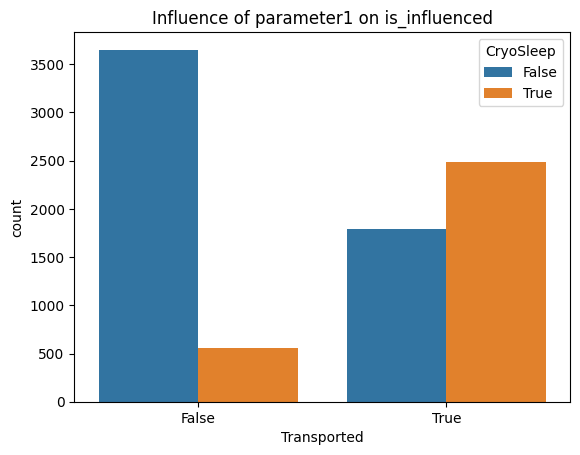

In [ ]:
sns.countplot(x='Transported', hue='CryoSleep', data=full_df)
plt.title('Influence of parameter1 on is_influenced')
plt.show()

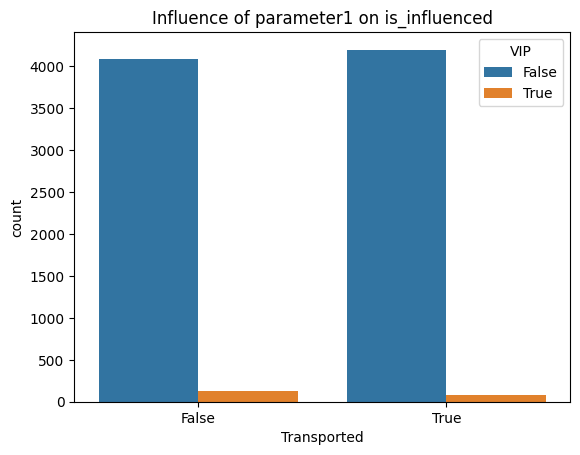

In [ ]:
sns.countplot(x='Transported', hue='VIP', data=full_df)
plt.title('Influence of parameter1 on is_influenced')
plt.show()

### Create preprocessing pipeline

In [ ]:
vanilla_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
vanilla_df = vanilla_df.drop(["PassengerId", "Name"], axis=1)

In [ ]:
vanilla_df.head(20)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [ ]:
vip_val = np.array(vanilla_df)[0][5]
vip_val

False

In [ ]:
object_params = [key for key, dtype in vanilla_df.dtypes.items() if dtype == "object"]
numerical_params = [key for key, dtype in vanilla_df.dtypes.items() if dtype == "float64"]
object_params, numerical_params

(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'],
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

In [ ]:
categorical_params = ["HomePlanet", "Destination"]
boolean_params = ["CryoSleep", "VIP"]
cabin_params = "Cabin"
LABEL_KEY = "Transported"

In [ ]:
features = vanilla_df.copy()
labels = features.pop("Transported")

Because of different datatypes we cant just feed the data into numpy array and then to the model.
Each column has to be handelt individualy.
We use Preprocessing so it gets saved with the model.

#### **tangent:** Symbolic tensors

a way to create operations but not run them.
-> to be precise we are creating computional graphs

In [ ]:
import tensorflow as tf
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = tf.math.add(tf.math.multiply(2., input), 1.)
result_2 = 2*input - 1
result_3 = result * result_2

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.math.add_2')>

In [ ]:
# now we use a tensorflow keras.Model to execut the computional graph

calculate_with_graph = tf.keras.Model(inputs=input, outputs=[result, result_2, result_3])
print(calculate_with_graph)
print(calculate_with_graph(2))
print(calculate_with_graph(4))

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, <tf.Tensor: shape=(), dtype=float32, numpy=15.0>]
[<tf.Tensor: shape=(), dtype=float32, numpy=9.0>, <tf.Tensor: shape=(), dtype=float32, numpy=7.0>, <tf.Tensor: shape=(), dtype=float32, numpy=63.0>]


So the tf.keras.Model(input,output) sets the inputs and outputs of the model.
With the Input you define dtype and shape of the data coming in.
 -> this can also be multiple sources goint to different places.
and with the output you define what are the results you want to extract
 -> can also be multiple


In [ ]:
[column.dtype for name, column in features.items()]

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')]

In [ ]:
# building a set of symbolic inputs with matchin names and dtypes for each csv column
inputs = {}
for name, column in features.items():
  dtype = column.dtype
  if name == "VIP" or name == "CryoSleep":
    dtype = tf.bool
  elif dtype == 'object':
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(), dtype=dtype, name=name)

inputs

{'HomePlanet': <KerasTensor: shape=(None,) dtype=string (created by layer 'HomePlanet')>,
 'CryoSleep': <KerasTensor: shape=(None,) dtype=bool (created by layer 'CryoSleep')>,
 'Cabin': <KerasTensor: shape=(None,) dtype=string (created by layer 'Cabin')>,
 'Destination': <KerasTensor: shape=(None,) dtype=string (created by layer 'Destination')>,
 'Age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Age')>,
 'VIP': <KerasTensor: shape=(None,) dtype=bool (created by layer 'VIP')>,
 'RoomService': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'RoomService')>,
 'FoodCourt': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'FoodCourt')>,
 'ShoppingMall': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'ShoppingMall')>,
 'Spa': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Spa')>,
 'VRDeck': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'VRDeck')>}

In [ ]:
#Split Cabin and get the required vaiables
cabin_input = inputs.get('Cabin')



split_cabin = tf.strings.split(cabin_input, sep="/")

cabin_deck_numeric = tf.strings.to_number(split_cabin[1], out_type=tf.float32)

cabin_deck_numeric.set_shape((1,))

inputs_cabin_deck = split_cabin[0]
inputs_cabin_num = cabin_deck_numeric
inputs_cabin_side =split_cabin[2]

# create vocabs
cabin = vanilla_df["Cabin"].dropna()
cabin_split= pd.DataFrame()
cabin_split[['CabinDeck', 'CabinNum', 'CabinSide']] = cabin.str.split('/', expand=True)
cabin_deck_vocab = cabin_split["CabinDeck"].unique()
cabin_side_vocab = cabin_split["CabinSide"].unique()

# create cabin variance and mean
cabin_num_var = np.var(np.array(cabin_split["CabinNum"].astype(float)))
cabin_num_mean = np.mean(np.array(cabin_split["CabinNum"].astype(float)))


In [ ]:
# List for the preprocessed inputs
preprocessed_inputs = []

In [ ]:

lookup = tf.keras.layers.StringLookup(vocabulary=cabin_deck_vocab)
one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size(), name="categorical_cabin_deck")

x = lookup(inputs_cabin_deck)
x = one_hot(x)

preprocessed_inputs.append(x)

lookup = tf.keras.layers.StringLookup(vocabulary=cabin_side_vocab)
one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size(), name="categorical_cabin_side")

x = lookup(inputs_cabin_side)
x = one_hot(x)

preprocessed_inputs.append(x)

In [ ]:
# Normalize CabinNum

norm = tf.keras.layers.Normalization(mean=cabin_num_mean, variance=cabin_num_var, axis=None, name="CabinNum")
x = norm(inputs_cabin_num)

preprocessed_inputs.append(x)
preprocessed_inputs

[<KerasTensor: shape=(9,) dtype=float32 (created by layer 'categorical_cabin_deck')>,
 <KerasTensor: shape=(3,) dtype=float32 (created by layer 'categorical_cabin_side')>,
 <KerasTensor: shape=(1,) dtype=float32 (created by layer 'CabinNum')>]

In [ ]:
# Preprocesing numeric values by concatenate and normalize them

# get all the columns in a dict with float type
numeric_inputs = {name:input for name, input in inputs.items()
                  if input.dtype == tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = tf.keras.layers.Normalization()

# calculate the normal variance with the complete numeric dataset
norm.adapt(np.array(vanilla_df[numeric_inputs.keys()], dtype=np.float32))

all_numeric_inputs = norm(x)

output = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=0), name="Cat_num")(all_numeric_inputs)

preprocessed_inputs.append(output)

In [ ]:
# Preprocess Strings
for name, input in inputs.items():
  if input.dtype != tf.string or name == "Cabin":
    continue

  vocab = np.unique(vanilla_df[name].dropna())

  lookup = tf.keras.layers.StringLookup(vocabulary=vocab)
  one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size(), name="categorical_"+name)

  x = lookup(input)
  x = one_hot(x)

  preprocessed_inputs.append(x)

In [ ]:
# Preprocess bools
for i, (name, input) in enumerate(inputs.items()):
  if input.dtype == tf.bool:
    print(name)
    x = tf.keras.layers.Lambda(lambda x: tf.cast(x, dtype=tf.float32), name=f"bools_{i}")(input)
    preprocessed_inputs.append(x)

CryoSleep
VIP


In [ ]:
preprocessed_inputs, inputs

([<KerasTensor: shape=(9,) dtype=float32 (created by layer 'categorical_cabin_deck')>,
  <KerasTensor: shape=(3,) dtype=float32 (created by layer 'categorical_cabin_side')>,
  <KerasTensor: shape=(1,) dtype=float32 (created by layer 'CabinNum')>,
  <KerasTensor: shape=(6,) dtype=float32 (created by layer 'Cat_num')>,
  <KerasTensor: shape=(4,) dtype=float32 (created by layer 'categorical_HomePlanet')>,
  <KerasTensor: shape=(4,) dtype=float32 (created by layer 'categorical_Destination')>,
  <KerasTensor: shape=(None,) dtype=float32 (created by layer 'bools_1')>,
  <KerasTensor: shape=(None,) dtype=float32 (created by layer 'bools_5')>],
 {'HomePlanet': <KerasTensor: shape=(None,) dtype=string (created by layer 'HomePlanet')>,
  'CryoSleep': <KerasTensor: shape=(None,) dtype=bool (created by layer 'CryoSleep')>,
  'Cabin': <KerasTensor: shape=(None,) dtype=string (created by layer 'Cabin')>,
  'Destination': <KerasTensor: shape=(None,) dtype=string (created by layer 'Destination')>,
  '

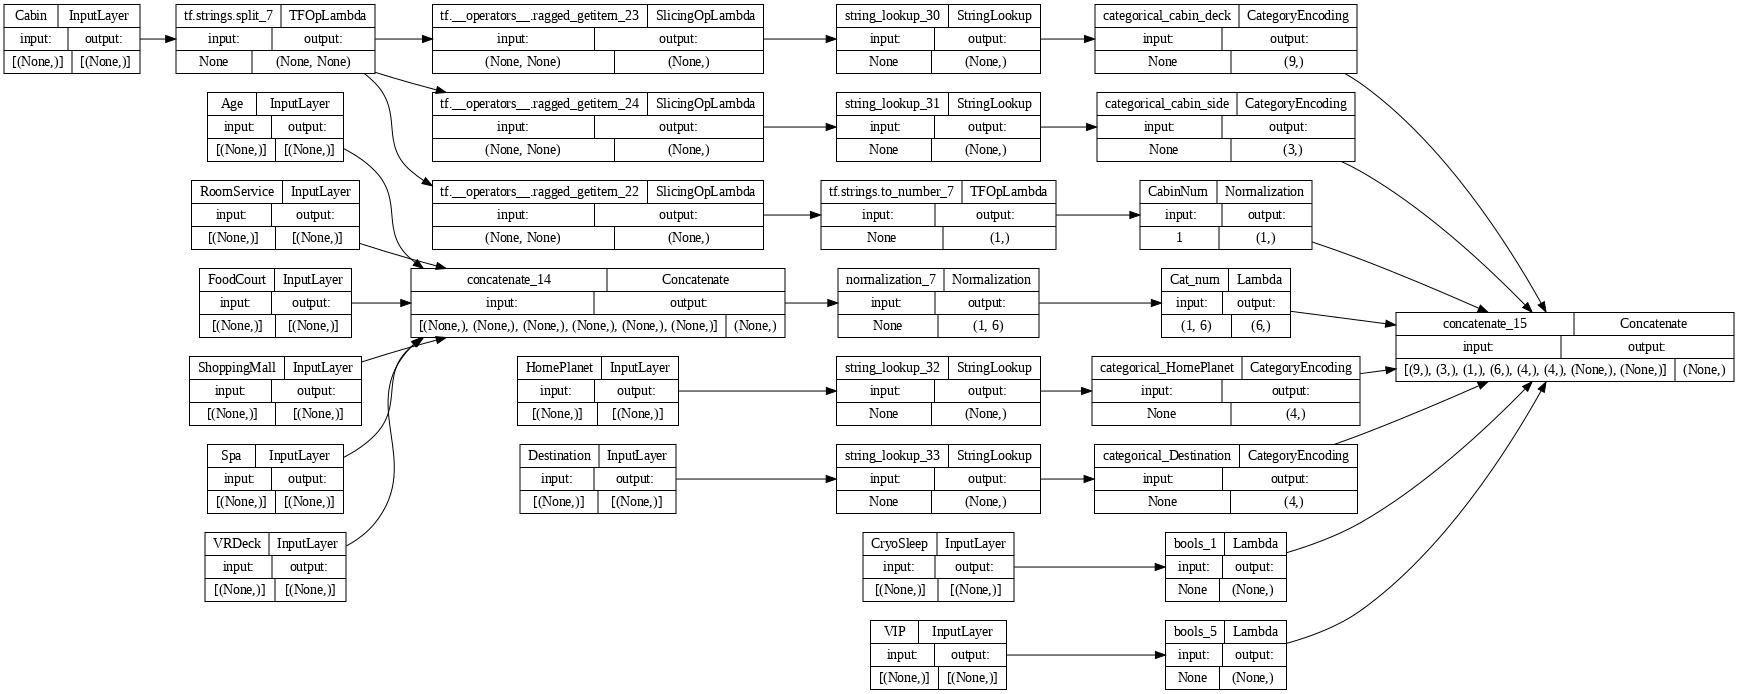

In [ ]:
preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

complete_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = complete_preprocessing , rankdir="LR", dpi=72, show_shapes=True)


In [ ]:
# you cant feed dataframes directly into the model so i create a dict
features_dict = {name: np.array(value)
                         for name, value in features.items()}

In [ ]:
# test preprocessing
features_dict = {name:values[:1] for name, values in features.items()}
for name, value in features_dict.items():
  print(f"""Name: {name}\nValue: {value[0]}\n\n""")

complete_preprocessing(features_dict)

Name: HomePlanet
Value: Europa


Name: CryoSleep
Value: False


Name: Cabin
Value: B/0/P


Name: Destination
Value: TRAPPIST-1e


Name: Age
Value: 39.0


Name: VIP
Value: False


Name: RoomService
Value: 0.0


Name: FoodCourt
Value: 0.0


Name: ShoppingMall
Value: 0.0


Name: Spa
Value: 0.0


Name: VRDeck
Value: 0.0


AttributeError: ignored

## Models

### model_0 Base model

In [ ]:
base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
])

classification = tf.keras.layers.Dense(1, activation="sigmoid")

input = complete_preprocessing()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                480       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11041 (43.13 KB)
Trainable params: 11041 (43.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_0 =model_0.fit(
    train_data,
    validation_data=(valid_x, valid_y),
    epochs=50
)

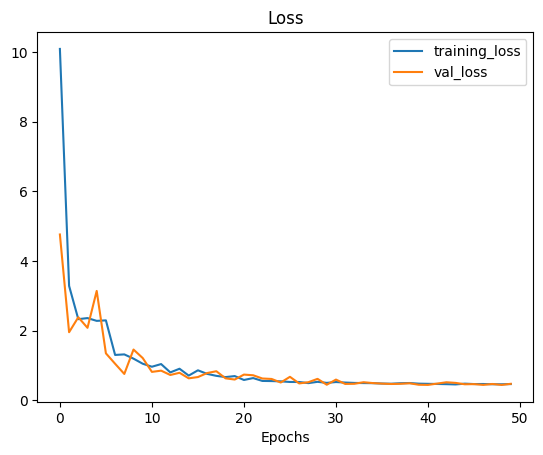

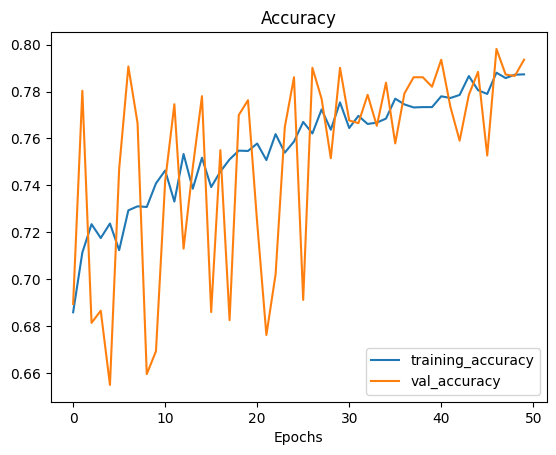

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.evaluate(valid_x, valid_y)

55/55 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7936


[0.47453010082244873, 0.7935594916343689]